In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import RidgeCV, LassoCV

import warnings

warnings.filterwarnings('ignore')

train = pd.read_csv('../datasets/train.csv')
test = pd.read_csv('../datasets/test.csv')

In [3]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [5]:
train.isna().sum()[train.isna().sum() == 0]

Id                 0
PID                0
MS SubClass        0
MS Zoning          0
Lot Area           0
Street             0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Exter Qual         0
Exter Cond         0
Foundation         0
Heating            0
Heating QC         0
Central Air        0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
Kitchen Qual       0
TotRms AbvGrd      0
Functional         0
Fireplaces         0
Paved Drive        0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch   

In [6]:
train.isna().sum()[train.isna().sum() != 0]

Lot Frontage       330
Alley             1911
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Qual           55
Bsmt Cond           55
Bsmt Exposure       58
BsmtFin Type 1      55
BsmtFin SF 1         1
BsmtFin Type 2      56
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area          1
Garage Qual        114
Garage Cond        114
Pool QC           2042
Fence             1651
Misc Feature      1986
dtype: int64

''

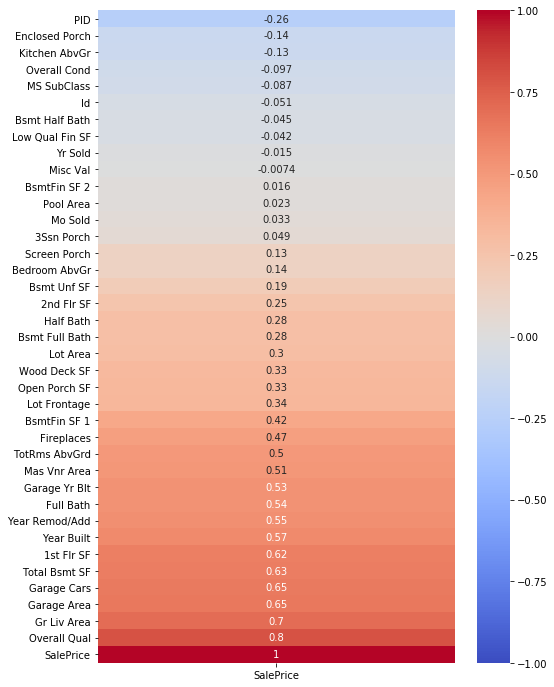

In [11]:
plt.figure(figsize = (8, 12))
sns.heatmap(train.corr()[['SalePrice']].sort_values('SalePrice'),
            annot = True,
            cmap = 'coolwarm',
            vmin = -1,
            vmax = 1)
;

''

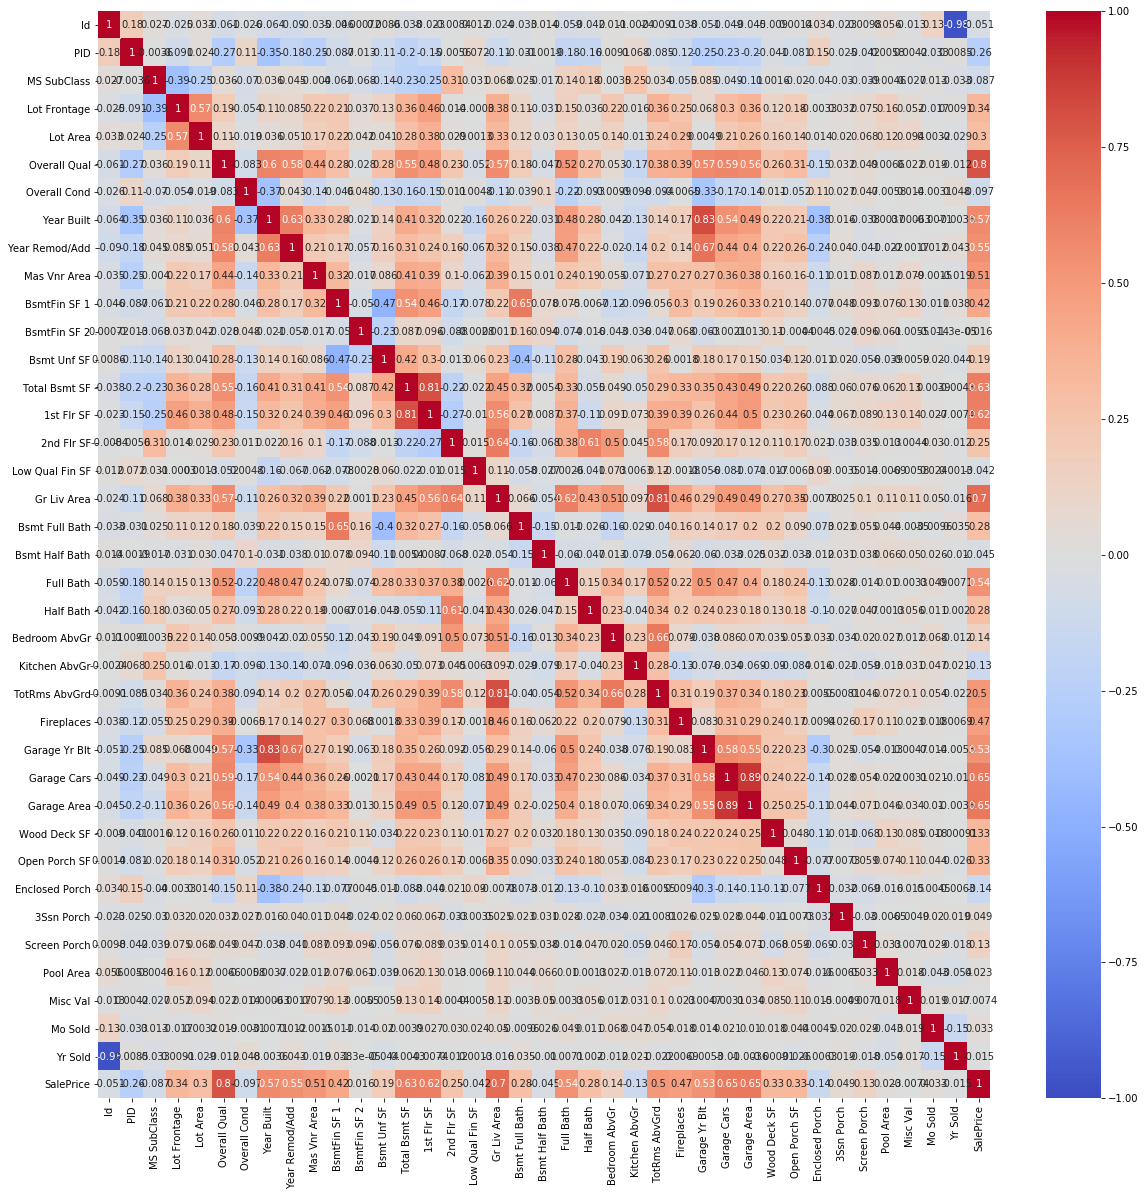

In [10]:
plt.figure(figsize = (20, 20))
sns.heatmap(train.corr(),
            annot = True,
            cmap = 'coolwarm',
            vmin = -1,
            vmax = 1)
;

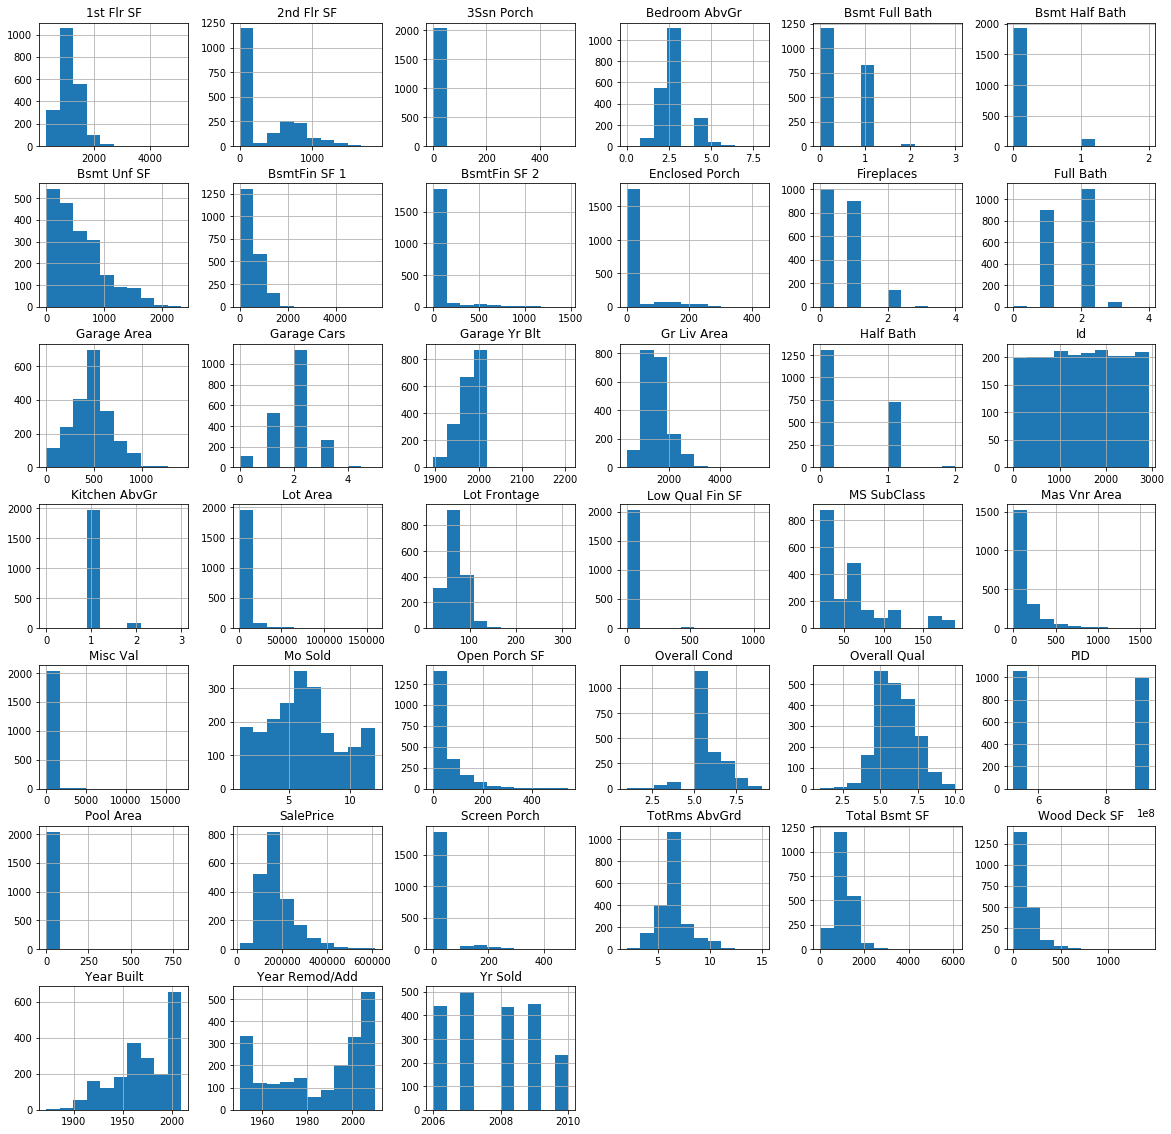

In [8]:
train.hist(figsize = (20,20));

## Feature Engineering

### Create new variables

In [44]:
train['age at sale'] = train['Yr Sold'] - train['Year Built']

In [45]:
train['age remod'] = train['Yr Sold'] - train['Year Remod/Add']

In [46]:
train['Overall QC'] = (train['Overall Qual'] + train['Overall Cond']) / 2

In [47]:
train['sf abvgrd'] = train['1st Flr SF'] + train['2nd Flr SF']

### Get Dummies

In [48]:
train['Mo Sold'] = train['Mo Sold'].astype(str)

In [49]:
train['MS SubClass'] = train['MS SubClass'].astype(str)

In [50]:
train = pd.get_dummies(train, columns = ['Mo Sold', 'MS SubClass'], drop_first = True)

''

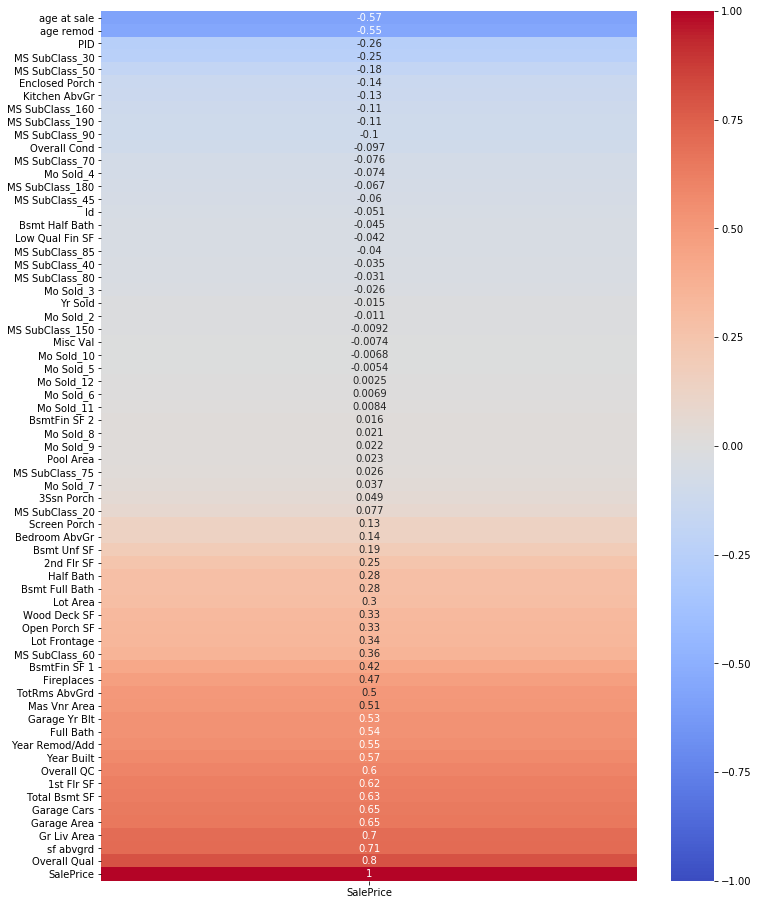

In [51]:
plt.figure(figsize = (12, 16))
sns.heatmap(train.corr()[['SalePrice']].sort_values('SalePrice'),
            annot = True,
            cmap = 'coolwarm',
            vmin = -1,
            vmax = 1)
;

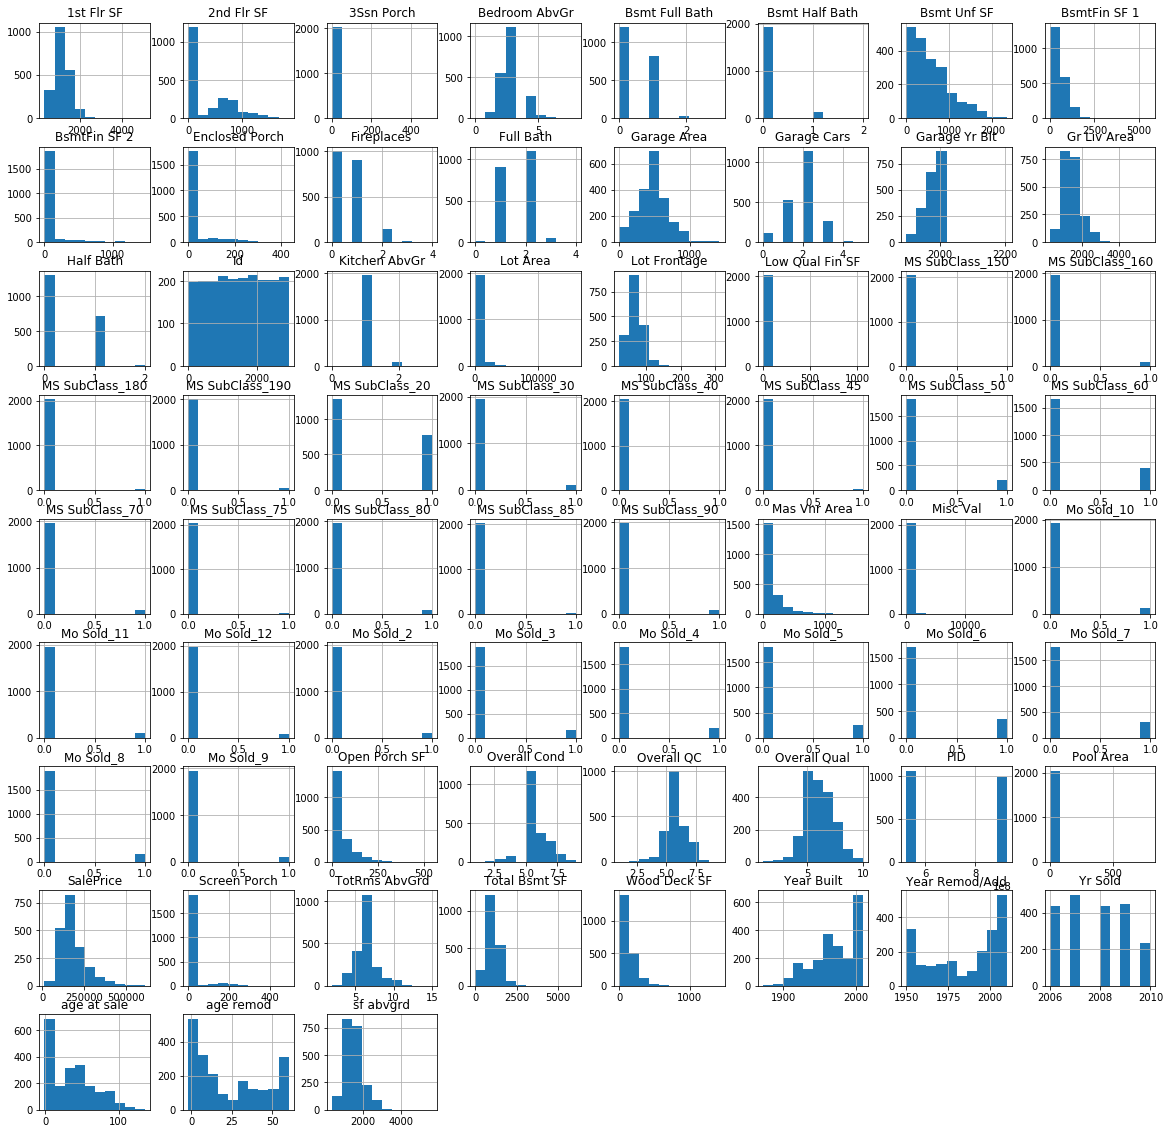

In [52]:
train.hist(figsize = (20,20));

In [53]:
list(train.columns)

['Id',
 'PID',
 'MS Zoning',
 'Lot Frontage',
 'Lot Area',
 'Street',
 'Alley',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Mas Vnr Area',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'BsmtFin Type 2',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'Kitchen Qual',
 'TotRms AbvGrd',
 'Functional',
 'Fireplaces',
 'Fireplace Qu',
 'Garage Type',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Cars',
 'Garage Area',
 'Garage Qua

In [54]:
def evaluate_model(model, X, y): 
    
    y_train_hat = ols.predict(X)

    mse = mean_squared_error(y, y_train_hat)
    rmse = mse ** .5
    r2 = r2_score(y, y_train_hat)

    print(f'R^2: {r2}')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')

In [55]:
train = train[train['Garage Area'].notna()]
train = train[train['Total Bsmt SF'].notna()]
train = train[train['Mas Vnr Area'].notna()]

In [56]:
X = train[['sf abvgrd', 'age at sale', 'age remod',
           'TotRms AbvGrd', 
           'Overall QC']]
y = train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

ols = LinearRegression()
ols.fit(X_train, y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
evaluate_model(ols, X_train, y_train)

R^2: 0.7186247974743027
MSE: 1745989346.43615
RMSE: 41785.03735113982


In [58]:
evaluate_model(ols, X_test, y_test)

R^2: 0.7618896888327499
MSE: 1527028409.8723962
RMSE: 39077.21087632018


In [59]:
cross_val_score(ols, X_train, y_train).mean()

0.7126240430684401

In [60]:
y_train_log = y_train.map(np.log)
y_test_log = y_test.map(np.log)

In [61]:
ols = LinearRegression()
ols.fit(X_train, y_train_log)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
cross_val_score(ols, X_train, y_train_log).mean()

0.7840513709358434

In [63]:
evaluate_model(ols, X_train, y_train_log)

R^2: 0.7904140690657888
MSE: 0.03583072215673514
RMSE: 0.18929004769595031


In [64]:
evaluate_model(ols, X_test, y_test_log)

R^2: 0.832634859408666
MSE: 0.027249307452231565
RMSE: 0.16507364251215748


In [65]:
y_hat_log = ols.predict(X_test)

In [66]:
mean_squared_error(y_test_log, y_hat_log)

0.027249307452231565

In [67]:
residuals = y_test_log - y_hat_log

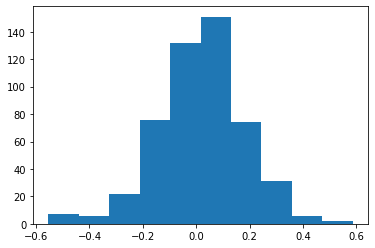

In [68]:
plt.hist(residuals);

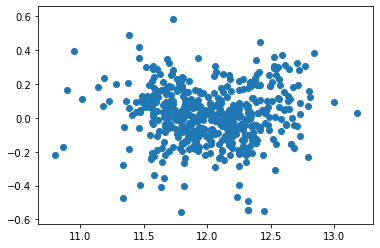

In [69]:
plt.scatter(y_hat_log,
            residuals);

In [70]:
predicted_price = np.exp(y_hat_log)

In [71]:
predicted_price

array([198888.24793427, 191245.90440988, 286411.75821853, 122001.41047726,
        86854.30659449, 109317.4393729 , 216680.12419391, 197072.26212496,
       103442.39680772, 207147.58784159, 103212.10451501, 127179.06487095,
       233693.23124811, 168742.42644733, 128355.06208442, 358935.19185703,
       202747.80526628, 293975.5769056 , 145046.21902441, 157209.55768586,
       257383.00090878, 329346.31224274, 224629.90489424, 149878.99388847,
       151140.00883004, 246625.0855431 , 203604.97381718, 107012.45638555,
       140520.15054207, 180562.76380507, 182615.39174842, 232758.03269257,
        54111.77498539, 185156.00436584, 277139.07239609, 239990.98083517,
       134031.42992461, 198224.64186122, 279381.66157977, 185626.57829468,
       141513.94012866,  94734.12014087, 226245.30339959, 199538.40605123,
       128700.47819068, 148598.04154149, 133214.2569311 , 137301.5742828 ,
       189362.82165422, 127820.416478  , 224208.58828289, 142515.26635762,
       187321.27357399, 1

# Test set: for submission

In [77]:
test['age at sale'] = test['Yr Sold'] - test['Year Built']
test['age remod'] = test['Yr Sold'] - test['Year Remod/Add']
test['Overall QC'] = (test['Overall Qual'] + test['Overall Cond']) / 2

In [85]:
test['sf abvgrd'] = test['1st Flr SF'] + test['2nd Flr SF']

In [86]:
test.fillna(0, inplace = True)

In [90]:
X_kaggle = test[['sf abvgrd', 'age at sale', 'age remod',
           'TotRms AbvGrd', 
           'Overall QC']]
test['SalePrice'] = np.exp(ols.predict(X_kaggle))

In [91]:
evaluate_model(ols, X_kaggle, test['SalePrice'])

R^2: -6.51210383862933
MSE: 35455757360.39617
RMSE: 188296.99243587555


In [66]:
test[['Id', 'SalePrice']].to_csv('../output_csvs/7_6_1_preds.csv', index = False)